# Data Protection & Privacy -- Exam Scripts

## 9cfu script analysis

Authors:
<br>
Kevin Cattaneo - S4944382
<br>
Riccardo Isola – S4943369


### Preliminary Operations


#### Imports


In [1]:
from generator import generate_data
import seaborn as sns
import matplotlib.pyplot as plt

#### Seed for reproducibility


In [2]:
SEED = 42
N = 10**4

#### Data generation


In [3]:
data = generate_data(
    seed=SEED,
    alpha=0.41,
    beta=0.54,
    gamma=0.05,
    delta_in=0.2,
    delta_out=0,
    n=N,
    progress=False,
)

### Script 1: Generalization


In [4]:
from scripts.generalization import preprocessing, anonymize_data

In [5]:
input = preprocessing(data)  # also consider the followers
output = anonymize_data(input, SEED)

In [6]:
input.head()

,username,name,surname,birth_date,gender,cap,address,city,phone_number,email,followers
0,montalcinilina,Cirillo,Sorrentino,2012-02-12,female,24129,"Viale Gramsci, 23",Caravita,08839659806,amadeofinotto@example.net,2835
1,serena67,Tina,Paganini,1992-03-30,male,43029,"Vicolo Murri, 128 Appartamento 4",Villefranche,37564682964,dverdone@example.net,1551
2,massimiliano24,Livio,Morrocco,1982-04-10,male,11015,"Viale Cappelli, 247 Piano 9",Rota D'Imagna,3774993581,beppe62@example.com,332
3,riccardocicala,Orlando,Cocci,1953-01-10,male,72021,"Stretto Jilani, 6",Iano,345308728,nicola06@example.org,0
4,cpacillo,Matilda,Giacconi,1987-03-06,non_binary,39018,"Vicolo Fortunata, 10",Deliceto,07769109984,dgaito@example.net,0


In [7]:
output.head()

,username,name,surname,birth_date,gender,cap,address,city,phone_number,email,followers
0,vjones,Matthew,Wade,2012-01-01,*,24000,Viale Gramsci,CA,088396*****,johnbeltran@example.org,2845
1,whitediana,Carolyn,Miller,1992-01-01,*,43000,Vicolo Murri,VI,375646*****,steelecindy@example.org,1544
2,qblack,Roy,Nelson,1982-01-01,*,11000,Viale Cappelli,RO,37749*****,jacksonjennifer@example.org,322
3,lisabuckley,Karen,Obrien,1953-01-01,*,72000,Stretto Jilani,IA,3453*****,hdelacruz@example.com,0
4,fjones,Amanda,Perkins,1987-01-01,*,39000,Vicolo Fortunata,DE,077691*****,andrewsbradley@example.org,0


We decide to plot how much our sensitive data (SD), in our case the followers, have been perturbated


Text(0, 0.5, 'mean of followers')

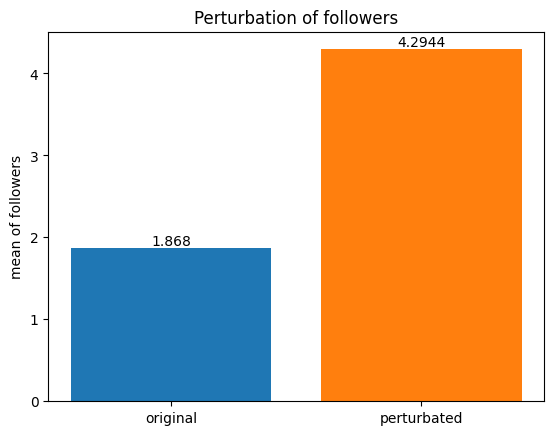

In [8]:
bars = {
    "original": input["followers"].mean(),
    "perturbated": output["followers"].mean(),
}
for name, bar in bars.items():
    r = plt.bar(name, bar)[0]
    plt.text(
        r.get_x() + r.get_width() / 2.0,
        bar,
        bar,
        ha="center",
        va="bottom",
    )
plt.title("Perturbation of followers")
plt.ylabel("mean of followers")

Then we look for the groups of common values we have created on the generalized data (on QI), in this case we focus on CAP (Italian postal code)


In [9]:
input["cap"].value_counts().min()

1

In [10]:
output["cap"].value_counts().min()

18

What we observe is that considering only the CAP, we obtain a 20 anonymous since one CAP is related to at least 20 different users


Finally we analyze the substitution we did on the EI, with focus on username. We search for number of collision we have produced, since we have chosen to substitute without unique values, inserting more anonymization (since multiple users can have the same username)


In [11]:
count = output["username"].value_counts()
count[count > 1].sum()

986

We obtain a great amount of collision. We consider the sum of all the username with frequency greater than 1.


We also report the fact we tried using the datafly-core algorithm as reported on paper, and still available on the script, but its k-anonymization results into a greater loss of utility.  
So we decided to show the results above without applying this kind of frequency consideration on the anonymized data. 

### Script 2: KMeans


In [12]:
K = 5  # number of clusters

Text(0.5, 0, 'n follower')

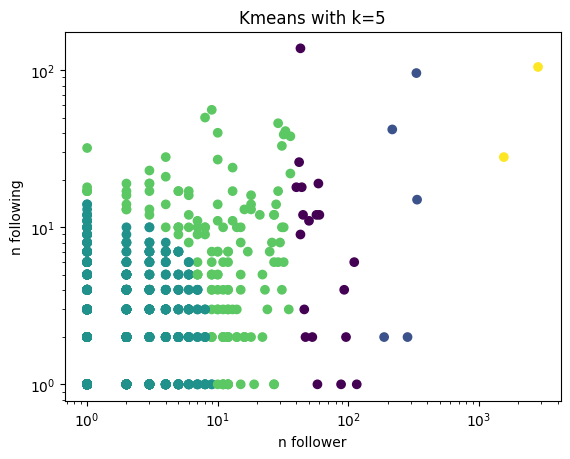

In [13]:
import random
from scripts.kmeans import Point, kmeans

random.seed(SEED)
in_degree = data.following.in_degree()
out_degree = data.following.out_degree()
degrees: list[Point] = [Point(in_degree[u], out_degree[u]) for u in data.following]
clusters = kmeans(degrees, K)
plt.scatter([d.x for d in degrees], [d.y for d in degrees], c=[c / K for c in clusters])
plt.yscale("log")
plt.xscale("log")
plt.title(f"Kmeans with k={K}")
plt.ylabel("n following")
plt.xlabel("n follower")

### Script 3: Graph


In [14]:
import networkx as nx
from typing import Any

We try a different graph to see how the algorithm performs  
<i>
Note: the paper is not so clear on many aspects involving some special cases; so we do not assure that the (2,1)-anonymization works as intended. For further details, please consult the relative comments in the relative script
</i>


In [16]:
from scripts.graph import check_weak


G = nx.Graph(
    [
        (1, 2),
        (1, 3),
        (1, 4),
        (2, 5),
        (2, 6),
        (3, 7),
        (3, 8),
        (4, 9),
        (5, 10),
        (5, 11),
        (6, 12),
        (6, 13),
        (7, 14),
        (7, 15),
        (8, 16),
        (8, 17),
        (9, 18),
        (9, 19),
        (10, 20),
        (10, 21),
        (11, 22),
        (11, 23),
        (12, 24),
        (12, 25),
        (13, 26),
        (13, 27),
        (14, 28),
        (14, 29),
        (15, 30),
        (15, 31),
        (16, 33),
        (17, 34),
        (17, 35),
        (18, 36),
        (18, 37),
        (19, 38),
        (19, 39),
        (20, 40),
        (20, 41),
        (22, 24),
        (23, 26),
        (25, 29),
        (27, 31),
        (28, 33),
        (30, 37),
        (32, 39),
        (34, 41),
    ]
)

check_weak(G, 2, 1)

False

In [17]:
from scripts.graph import anonymize

Ga = anonymize(G)

check_weak(Ga, 2, 1)

True

### Statistical informations

Then we decide to plot some common statistical measurements


We selected:

-   Node removal robustness
-   Diameter and mean degree
-   Closeness
-   Betweenness


In [18]:
from __future__ import annotations


def robustness(G: nx.Graph[Any]) -> list[float]:
    G = G.copy()
    initial_size = len(max(nx.connected_components(G), key=len))
    result: list[float] = []
    for node in G.copy().nodes():
        result.append(len(max(nx.connected_components(G), key=len)) / initial_size)
        G.remove_node(node)
    return result

In [19]:
y_original = robustness(G)
y_anonymized = robustness(Ga)

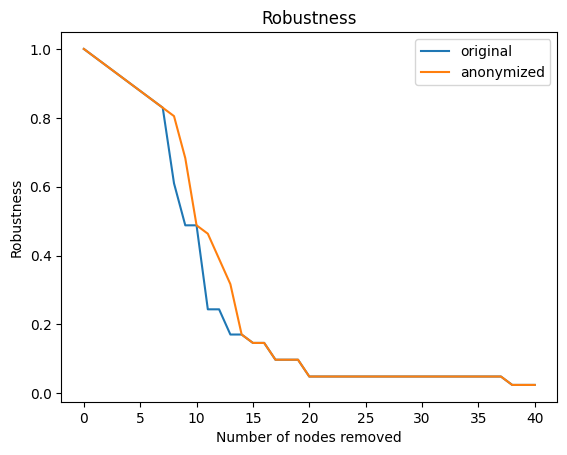

In [20]:
plt.title("Robustness")
plt.plot(y_original, label="original")
plt.plot(y_anonymized, label="anonymized")
plt.xlabel("Number of nodes removed")
plt.ylabel("Robustness")
plt.legend()
plt.show()

In [21]:
original_diameter = nx.diameter(nx.Graph(G))
anonymized_diameter = nx.diameter(nx.Graph(Ga))
print(original_diameter, anonymized_diameter)

10 8


Text(0, 0.5, 'Diameter')

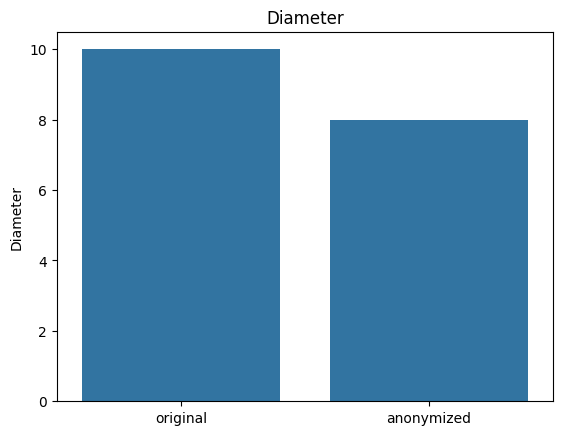

In [22]:
sns.barplot({"original": original_diameter, "anonymized": anonymized_diameter})
plt.title("Diameter")
plt.ylabel("Diameter")

In [23]:
from statistics import mean

original_degree = mean(len(G[d]) for d in G)
anonymized_degree = mean(len(Ga[d]) for d in Ga)
print(original_degree, anonymized_degree)

2.292682926829268 2.5853658536585367


Text(0, 0.5, 'Degree')

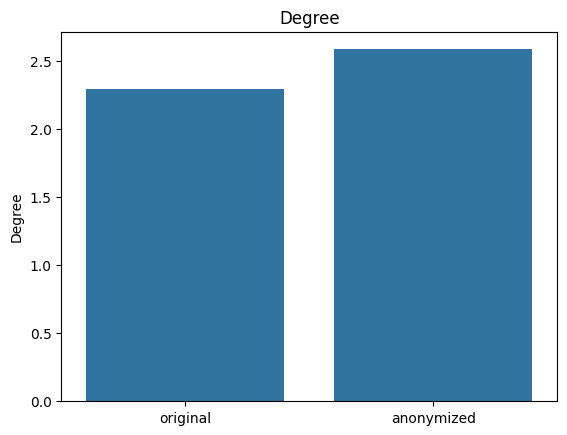

In [24]:
sns.barplot({"original": original_degree, "anonymized": anonymized_degree})
plt.title("Degree")
plt.ylabel("Degree")

In [25]:
original_closeness = mean(nx.closeness_centrality(G).values())
anonymized_closeness = mean(nx.closeness_centrality(Ga).values())
print(original_closeness, anonymized_closeness)

0.21018333892199956 0.25265267885334475


Text(0, 0.5, 'Closeness')

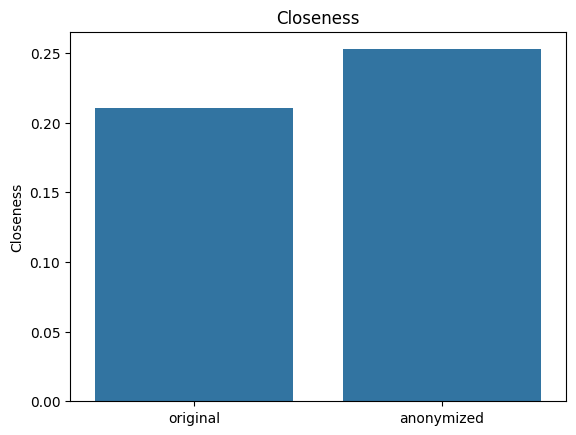

In [26]:
sns.barplot({"original": original_closeness, "anonymized": anonymized_closeness})
plt.title("Closeness")
plt.ylabel("Closeness")

In [27]:
original_betweenness = mean(nx.betweenness_centrality(G).values())
anonymized_betweenness = mean(nx.betweenness_centrality(Ga).values())
print(original_betweenness, anonymized_betweenness)

0.09962476547842401 0.0776735459662289


Text(0, 0.5, 'Betweenness')

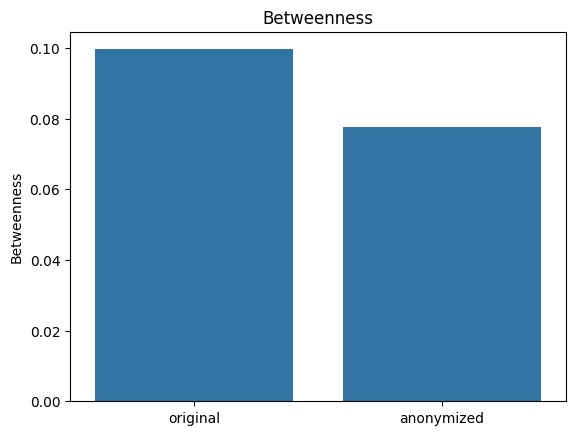

In [28]:
sns.barplot({"original": original_betweenness, "anonymized": anonymized_betweenness})
plt.title("Betweenness")
plt.ylabel("Betweenness")

The anonymization perturbates some metrics of the graph:

-   the most of metrics in the anonymized version has a bigger value, that's beacause the adding of edges may increase the centrality of nodes and their connection of each other, as stated also by the littler diameter.
-   on the other hand we observe a smaller betweennes, that may stand for less 'importance' for nodes.
